In [1]:
#for pandas
import pandas as pd

In [2]:
#for numpy
import numpy as np

In [3]:
#for plotting purposes
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#scikit learn functions
from sklearn import svm                                 #for using svm model
from sklearn.model_selection import StratifiedKFold     #k fold crossvalidation
from sklearn.metrics import f1_score                    #computing f1score

In [5]:
#normalizes values of input array with its own mean and deviation
def feature_normalize_own(x):
    m=x.shape[0]
    mu=(1/m)*np.sum(x,axis=0)
    sig=np.std(x,axis=0,ddof=1)
    mu[0]=0
    sig[0]=1
    x=(x-mu)/sig
    return x,mu,sig

In [6]:
#normalizes values of input array with mean and deviation of training array
def feature_normalize_other(x,mu,sig):
    x=(x-mu)/sig
    return x

In [7]:
#file location of training set
dfl="C:/Users/Ritik/Desktop/Projects_Flash/London/train.csv"

In [8]:
#reading file contents
datain=pd.read_csv(dfl,header=None)

In [9]:
#taking a glance at training set
datain.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


Now we have done checking for null..etc in logistic model and found nothing

In [10]:
#data file location of output values of tarining set
dfl="C:/Users/Ritik/Desktop/Projects_Flash/London/trainLabels.csv"

In [11]:
dataout=pd.read_csv(dfl,header=None)

dividing into train and validation set

In [12]:
#getting into numpy array format
xtrain=np.array(datain)
ytrain=np.array(dataout).reshape(-1,1)
print(xtrain.shape)
print(ytrain.shape)

(1000, 40)
(1000, 1)


Now we will use firstly select best parameter C by also making use of StratifiedKFold

In [13]:
#trying some values of penalty parameter C
Cset=np.linspace(0.0005,0.1,40)
skf=StratifiedKFold(n_splits=10)
Score=np.zeros(len(Cset))
for train_index,val_index in skf.split(xtrain,ytrain):
    xt=xtrain[train_index,:]
    yt=(ytrain[train_index]).reshape(-1,1)
    xv=xtrain[val_index,:]
    yv=(ytrain[val_index]).reshape(-1,1)
    xt,mu,sig=feature_normalize_own(xt)
    xv=feature_normalize_other(xv,mu,sig)
    for i in range(0,len(Cset)):
      clf=svm.SVC(kernel='linear',C=Cset[i])
      clf=clf.fit(xt,yt.ravel())
      prediction=np.zeros(xv.shape[0])
      for d in range(0,len(prediction)):
            prediction[d]=clf.predict([xv[d,:]])
      Score[i]=Score[i]+f1_score(yv,prediction)


0.005602564102564102


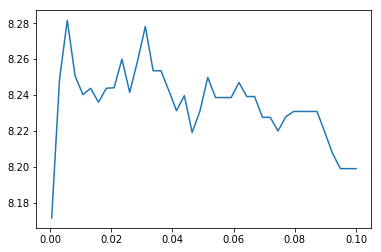

In [14]:
plt.plot(Cset,Score)
C_linear_opt=Cset[np.argmax(Score)]
print(C_linear_opt)

Now finding non linear kernels parameters

In [15]:
#trying some values of penaly parameter C and kernel parameter gamma
Cset=np.linspace(0.1,10,10)
gammaset=np.linspace(0.1,2,20)
skf=StratifiedKFold(n_splits=10)
score=np.zeros((len(Cset),len(gammaset)))
for train_index,val_index in skf.split(xtrain,ytrain):
   xt=xtrain[train_index,:]
   yt=(ytrain[train_index]).reshape(-1,1)
   xv=xtrain[val_index,:]
   yv=(ytrain[val_index]).reshape(-1,1)
   xt,mu,sig=feature_normalize_own(xt)
   xv=feature_normalize_other(xv,mu,sig)
   for i in range(0,len(Cset)):
     for j in range(0,len(gammaset)):
       clf=svm.SVC(kernel='rbf',C=Cset[i],gamma=gammaset[j])
       clf=clf.fit(xt,yt.ravel())
       prediction=np.zeros(xv.shape[0])
       for d in range(0,len(prediction)):
         prediction[d]=clf.predict([xv[d,:]])
       score[i,j]=score[i,j]+f1_score(yv,prediction)

In [16]:
#extracting best gamma and c value
gamma_rbf_opt,C_rbf_opt=gammaset[np.argmax(score)%len(gammaset)],Cset[int(np.argmax(Score)/len(gammaset))]
print(gamma_rbf_opt,C_rbf_opt)

0.1 0.1


In [17]:
#datafilelocation of test set
dfl="C:/Users/Ritik/Desktop/Projects_Flash/London/test.csv"

In [18]:
datatest=pd.read_csv(dfl,header=None)

In [19]:
xtest=np.array(datatest)

In [20]:
#normalizing xtrain and xtest
xtrain_one,mu_one,sig_one=feature_normalize_own(xtrain)
xtest_one=feature_normalize_other(xtest,mu_one,sig_one)

In [21]:
#outputting linear solution
clf=svm.SVC(kernel='linear',C=C_linear_opt)
clf=clf.fit(xtrain_one,ytrain.ravel())
prediction=np.zeros(xtest_one.shape[0])
for d in range(0,len(prediction)):
  prediction[d]=clf.predict([xtest_one[d,:]])
output=np.hstack((np.arange(1,xtest_one.shape[0]+1,1).reshape(-1,1),prediction.reshape(-1,1)))
np.savetxt("SVM_linear_Sol_1.csv",output,header="Id,Solution",delimiter=",")

In [22]:
#outputting non-linear solution
clf=svm.SVC(kernel='rbf',C=C_rbf_opt,gamma=gamma_rbf_opt)
clf=clf.fit(xtrain_one,ytrain.ravel())
prediction=np.zeros(xtest_one.shape[0])
for d in range(0,len(prediction)):
  prediction[d]=clf.predict([xtest_one[d,:]])
output=np.hstack((np.arange(1,xtest_one.shape[0]+1,1).reshape(-1,1),prediction.reshape(-1,1)))
np.savetxt("SVM_rbf_Sol_1.csv",output,header="Id,Solution",delimiter=",")